## Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [21]:
plt.style.use('fivethirtyeight')

In [22]:
data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [23]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [24]:
len(data)

18278

## Cleaning the data file

In [25]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [26]:
drop_cols = ['sofifa_id', 'player_url', 'long_name', 'dob']
data.drop(columns=drop_cols, inplace = True)

In [27]:
data.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_re

In [28]:
data['club'].value_counts()

Brighton & Hove Albion    33
FC Nantes                 33
Crystal Palace            33
Real Madrid               33
1. FSV Mainz 05           33
                          ..
Chile                      1
Netherlands                1
Austria                    1
Canada                     1
Colombia                   1
Name: club, Length: 698, dtype: int64

In [29]:
# data.isna().any(axis=0)
data['preferred_foot'].isna().sum()

0

## Data visualisations

**Foot Preference of players**

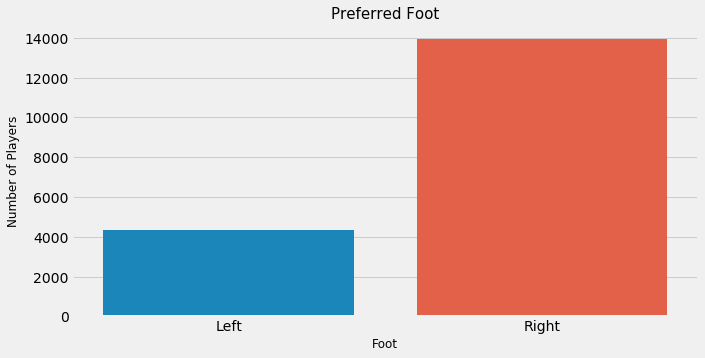

In [30]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(data['preferred_foot'])
plt.title("Preferred Foot",fontsize=15)
plt.xlabel("Foot",fontsize=12)
plt.ylabel("Number of Players",fontsize=12)
plt.show()

In [31]:
data['weak_foot'].value_counts()

3    11347
2     3865
4     2666
5      245
1      155
Name: weak_foot, dtype: int64

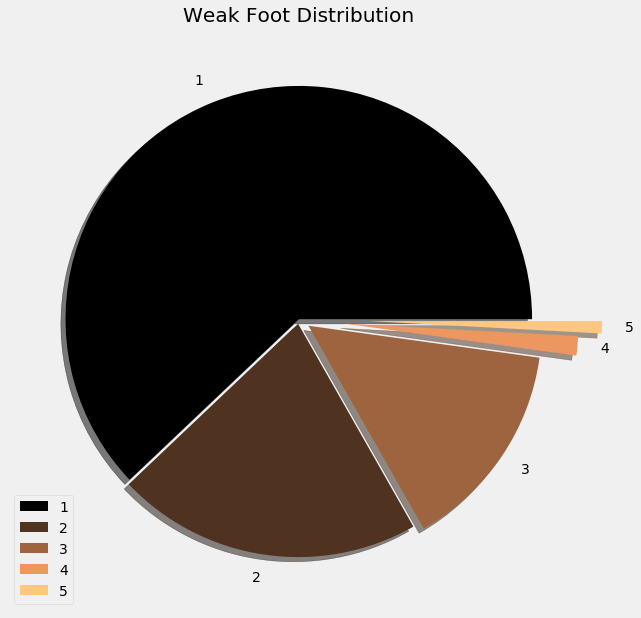

In [32]:
weak_foot = data['weak_foot'].value_counts()
labels = ['1','2','3','4','5']
explode = [0,0.02,0.05,0.2,0.3]
colour = plt.cm.copper(np.linspace(0,1,5))
plt.rcParams['figure.figsize'] = (10,10)

plt.pie(weak_foot, labels= labels, colors = colour, explode = explode, shadow=True)
plt.title("Weak Foot Distribution")
plt.legend()
plt.show()

In [33]:
data['player_positions'].value_counts()

CB             2322
GK             2036
ST             1809
CM              786
CDM, CM         731
               ... 
CF, LW, ST        1
CF, LM, CAM       1
CM, RM, CF        1
CM, CDM, ST       1
CM, LM, CB        1
Name: player_positions, Length: 643, dtype: int64

In [34]:
def get_positions(player_pos):
    return(player_pos.split(',')[0])

data['Positions'] = data['player_positions'].apply(lambda x: f"{get_positions(x)}")

In [35]:
data.Positions.value_counts()

CB     3162
ST     2582
CM     2193
GK     2036
CDM    1424
RB     1314
LB     1303
CAM    1146
RM     1050
LM     1049
LW      378
RW      369
CF      113
LWB      90
RWB      69
Name: Positions, dtype: int64

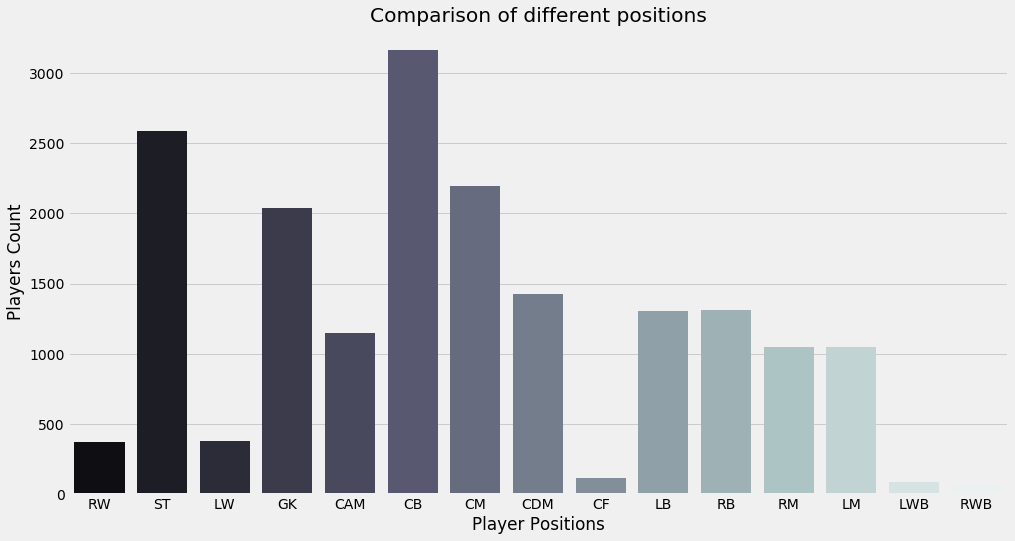

In [36]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(data.Positions, palette='bone')
plt.xlabel("Player Positions")
plt.ylabel("Players Count")
plt.title("Comparison of different positions")
plt.show()

In [38]:
data['wage_eur'].describe()

count     18278.000000
mean       9456.942773
std       21351.714095
min           0.000000
25%        1000.000000
50%        3000.000000
75%        8000.000000
max      565000.000000
Name: wage_eur, dtype: float64

In [109]:
highest_paid = '{}'.format(*data.loc[data['wage_eur'] == data['wage_eur'].max(),['short_name']].values[0])

In [110]:
highest_paid

'L. Messi'

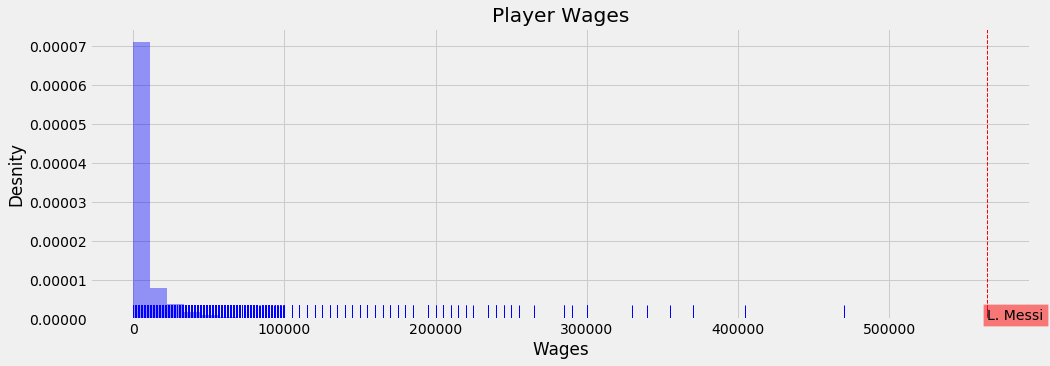

In [120]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
sns.distplot(data['wage_eur'], color='blue', norm_hist=True,rug=True,kde=False)
plt.axvline(data['wage_eur'].max(), color='red', linestyle='dashed',linewidth=1.0)
plt.text(data['wage_eur'].max(),0,s = highest_paid, bbox=dict(facecolor='red',alpha=0.5),withdash=True)
plt.xlabel('Wages')
plt.ylabel('Desnity')
plt.title("Player Wages")
plt.show()

In [112]:
data['value_eur'].describe()

count    1.827800e+04
mean     2.484038e+06
std      5.585481e+06
min      0.000000e+00
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.055000e+08
Name: value_eur, dtype: float64

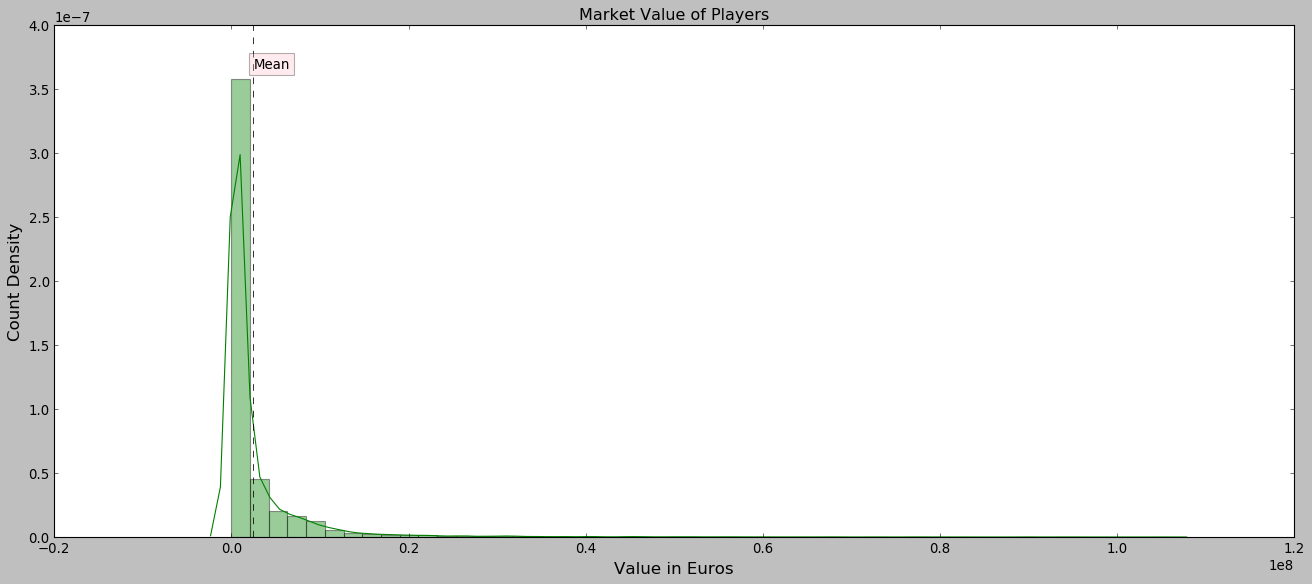

In [147]:
plt.figure(figsize=(20,8))

y_mean_pos = 3.75 / 10**7

plt.style.use('_classic_test')
sns.distplot(data['value_eur'], color='green',norm_hist=False)
plt.axvline(data['value_eur'].mean(),color='black',linewidth=0.7,linestyle='dashed')
plt.text(data['value_eur'].mean(),y_mean_pos,s='Mean',bbox=dict(facecolor='pink',alpha=0.3),verticalalignment='top')
plt.xlabel('Value in Euros',fontsize=15)
plt.ylabel('Count Density',fontsize=15)
plt.title("Market Value of Players")
plt.show()

In [148]:
data.overall.describe()

count    18278.000000
mean        66.244994
std          6.949953
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

In [152]:
data.potential.describe()

count    18278.000000
mean        71.546887
std          6.139669
min         49.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: potential, dtype: float64

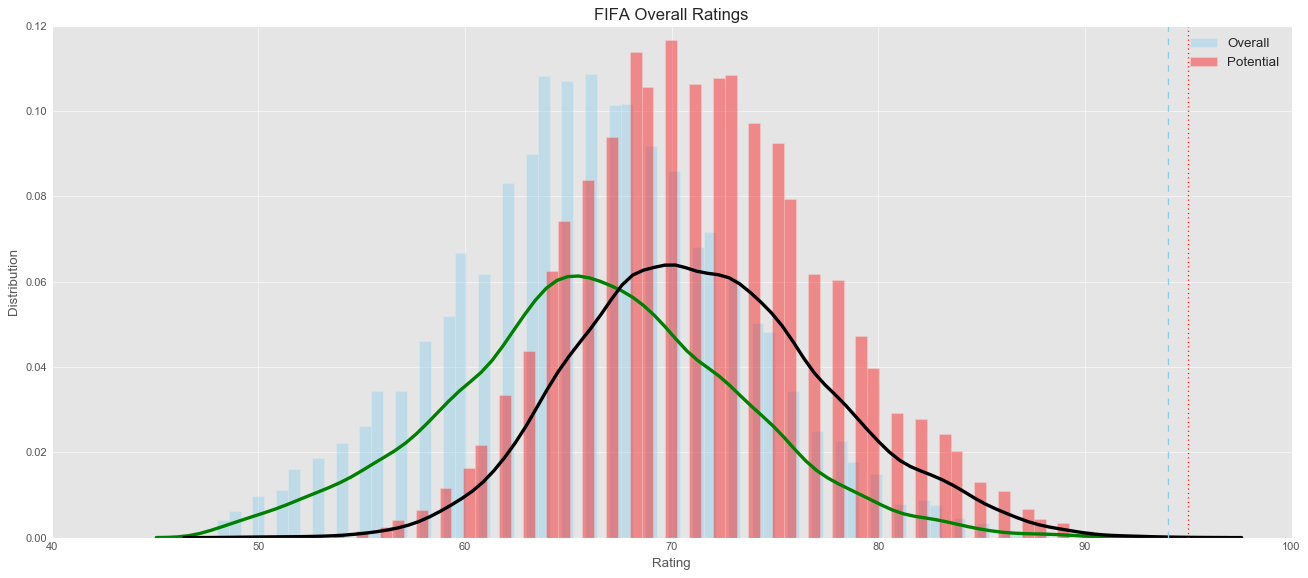

In [196]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')

max_potential = "{}".format(*data.loc[data['potential'] == data['potential'].max(),['short_name']].values[0])
max_overall = "{}".format(*data.loc[data['overall'] == data['overall'].max(),['short_name']].values[0])

sns.distplot(data.overall, bins=80,color='skyblue', norm_hist=False, kde_kws=dict(linewidth=3,color='green'),label='Overall')
sns.distplot(data.potential, bins=80,color='red', norm_hist=False, kde_kws=dict(linewidth=3,color='black'),label='Potential')
plt.axvline(data.overall.max(), color='skyblue',linewidth=1.2,linestyle='dashed')
plt.axvline(data.potential.max(), color='red',linewidth=1.2,linestyle='dotted')
# plt.text(max_overall, 0.12,s='Max ovr', bbox=dict(facecolor='teal',alpha=0.3),verticalalignment='center')
# plt.text(max_potential, 0.12,s='Max pot', bbox=dict(facecolor='olive',alpha=0.3),verticalalignment='top')
plt.title('FIFA Overall Ratings',fontsize=15)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.legend()
plt.show()